In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
!ls

Airline Delays, 2004-2019.ipynb airline_delay_causes.csv


In [3]:
df = pd.read_csv("airline_delay_causes.csv")

In [4]:
#Delays/cancellations over time - worst seasons to travel (calendar heatmap)
#Sankey Diagram for each airport
#Average airline delay at each airport

In [5]:
df.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [6]:
df=df.rename(columns={' month': 'month',
                     ' weather_ct': 'weather_ct',
                     ' arr_delay': 'arr_delay',
                     ' carrier_delay': 'carrier_delay'})

In [7]:
df = df.drop(['carrier'], axis=1)

In [8]:
df.head()

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,5,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1296.0,277.0,66.43,4.00,166.35,0.23,39.98,1.0,6.0,13201.0,4795.0,409.0,5761.0,8.0,2228.0
1,2004,5,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",2684.0,461.0,70.67,1.32,189.79,12.11,187.11,1.0,8.0,20322.0,3605.0,36.0,6773.0,449.0,9459.0
2,2004,5,Continental Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",31.0,5.0,0.72,1.00,3.28,0.00,0.00,0.0,0.0,278.0,86.0,73.0,119.0,0.0,0.0
3,2004,5,Atlantic Coast Airlines,JFK,"New York, NY: John F. Kennedy International",445.0,96.0,30.73,3.40,24.62,0.00,37.25,8.0,2.0,7433.0,1986.0,471.0,1728.0,0.0,3248.0
4,2004,5,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1175.0,317.0,51.60,1.93,227.31,0.85,35.31,3.0,2.0,13689.0,3113.0,57.0,8289.0,28.0,2202.0


In [9]:
df.groupby(by='airport')['weather_delay'].sum()

airport
EWR    1360159.0
JFK    1074943.0
LGA    1518860.0
Name: weather_delay, dtype: float64

In [10]:
df.carrier_name.value_counts()

Delta Air Lines Inc.            543
American Airlines Inc.          543
JetBlue Airways                 522
United Air Lines Inc.           500
ExpressJet Airlines Inc.        430
US Airways Inc.                 382
American Eagle Airlines Inc.    339
Mesa Airlines Inc.              243
Continental Air Lines Inc.      237
Comair Inc.                     236
Alaska Airlines Inc.            226
Southwest Airlines Co.          219
Northwest Airlines Inc.         204
AirTran Airways Corporation     190
Virgin America                  170
Frontier Airlines Inc.          169
Atlantic Southeast Airlines     166
SkyWest Airlines Inc.           147
Envoy Air                       101
Pinnacle Airlines Inc.           99
Spirit Air Lines                 85
Hawaiian Airlines Inc.           84
Endeavor Air Inc.                66
ATA Airlines d/b/a ATA           53
Republic Airline                 51
America West Airlines Inc.       40
PSA Airlines Inc.                32
Independence Air            

In [11]:
import scipy


# Longest Delays in Minutes

In [12]:
df['delay_ratio'] = (df['arr_delay'] *100) / (df['arr_flights'])

In [13]:
delays = df.pivot_table(columns='month', index='carrier_name', values='delay_ratio')#.reset_index()

In [14]:
delays = delays.sort_values(7)

In [15]:
delays = delays.dropna()

In [16]:
delays.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
Hawaiian Airlines Inc.,2215.255045,2626.274583,800.205478,804.812992,727.393753,890.158730,846.543779,664.055300,557.896825,594.880057,582.246642,1036.264216
Envoy Air,2273.841626,2044.211452,1594.375651,1662.422643,1781.405115,1822.793399,1266.450348,1306.489711,1243.543257,1407.284127,1436.336030,1966.851067
Allegiant Air,2732.211538,259.767442,306.250000,799.415535,767.345377,682.089552,1314.473684,822.727273,431.707317,473.076923,284.615385,503.921569
PSA Airlines Inc.,2075.326534,2328.817171,1907.198121,1898.115655,1422.066157,2905.732484,1577.707006,2017.901235,1114.093960,1840.310847,1779.190476,1219.931319
Alaska Airlines Inc.,1309.902593,1268.672921,1269.660409,1693.382411,1268.609962,1478.015427,1685.084234,1260.435650,839.064362,919.636864,1272.483205,1594.183828


([<matplotlib.axis.XTick at 0x117ea6470>,
 <a list of 12 Text xticklabel objects>)

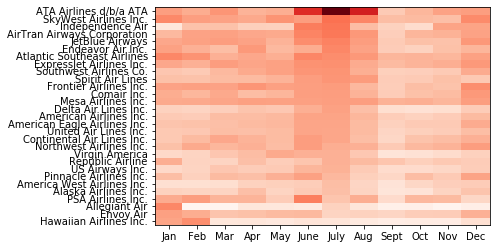

In [17]:
plt.pcolor(delays, cmap='Reds')

tick_labels = delays.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Cancelled Flights

In [18]:
df['cancelled_ratio'] = (df['arr_cancelled'] *100) / (df['arr_flights'])

In [19]:
cancelled = df.pivot_table(columns='month', index='carrier_name', values='cancelled_ratio')#.reset_index()

In [20]:
cancelled = cancelled.sort_values(7)

In [21]:
cancelled.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
Hawaiian Airlines Inc.,0.492611,0.571429,0.460829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.382488,0.000000,0.000000
Virgin America,3.731372,4.420208,3.018088,0.423012,0.212465,0.453601,0.433129,0.457789,0.200507,0.884958,0.713969,0.564037
Alaska Airlines Inc.,2.422879,2.087072,1.560575,0.172840,0.049544,0.175187,0.527739,0.637926,0.051328,0.558811,0.238521,0.833033
Frontier Airlines Inc.,3.057241,2.734886,1.592752,0.450898,0.979799,0.509795,1.030732,1.459385,0.275492,0.956008,0.512177,2.288166
Continental Air Lines Inc.,2.140214,3.561373,1.585889,0.809079,0.450030,0.932768,1.174857,1.159282,1.569126,0.689971,0.347058,2.100410


In [22]:
cancelled = cancelled.dropna()

([<matplotlib.axis.XTick at 0x1185f3208>,
 <a list of 12 Text xticklabel objects>)

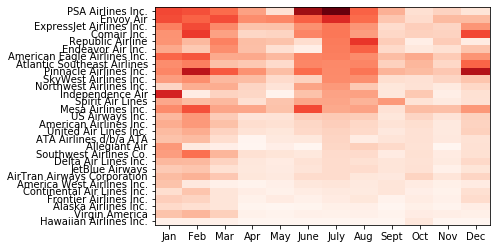

In [23]:
plt.pcolor(cancelled, cmap='Reds')

tick_labels = cancelled.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Longest Weather Delays

In [24]:
weather = df.pivot_table(columns='month', index='carrier_name', values='weather_delay')#.reset_index()

In [25]:
weather = weather.sort_values(7)

In [26]:
weather = weather.dropna()

In [27]:
weather.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
PSA Airlines Inc.,50.400000,64.000000,4.000000,75.500000,2.5,130.000000,0.000000,107.000000,0.000000,43.000000,51.000000,20.500000
Independence Air,58.500000,28.000000,3.000000,23.000000,77.5,25.500000,9.000000,87.500000,14.000000,10.400000,8.500000,11.750000
Frontier Airlines Inc.,14.285714,5.785714,14.357143,10.428571,48.4,20.642857,10.857143,15.071429,10.285714,4.928571,0.428571,23.428571
ATA Airlines d/b/a ATA,112.000000,0.000000,47.000000,36.666667,59.6,20.833333,12.666667,1.333333,1.200000,0.000000,4.000000,2.000000
Hawaiian Airlines Inc.,382.000000,197.142857,2.000000,3.428571,0.0,0.000000,14.428571,0.000000,0.000000,0.000000,8.714286,0.000000


([<matplotlib.axis.XTick at 0x118aa2390>,
 <a list of 12 Text xticklabel objects>)

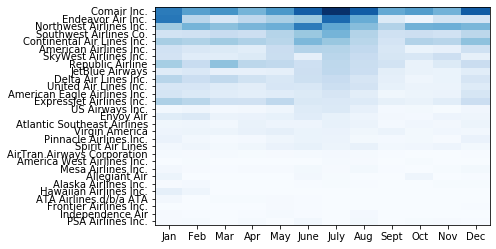

In [28]:
plt.pcolor(weather, cmap='Blues')

tick_labels = weather.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Delayed Fligths

In [29]:
df['delayed_ratio'] = (df['arr_del15'] *100) / (df['arr_flights'])

In [30]:
delayed = df.pivot_table(columns='month', index='carrier_name', values='delayed_ratio')#.reset_index()

In [31]:
delayed = delayed.sort_values(7)

In [32]:
delayed = delayed.dropna()

([<matplotlib.axis.XTick at 0x118b7d4a8>,
 <a list of 12 Text xticklabel objects>)

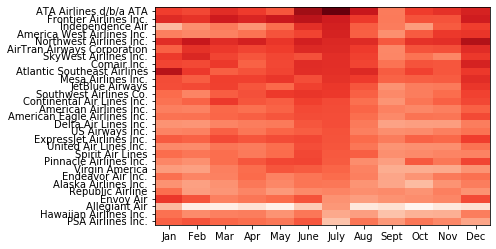

In [33]:
plt.pcolor(delayed, cmap='Reds')

tick_labels = delayed.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Longest Carrier Delays

In [34]:
carrier_delay = df.pivot_table(columns='month', index='carrier_name', values='carrier_delay')#.reset_index()

In [35]:
carrier_delay = carrier_delay.sort_values(7)

In [36]:
carrier_delay = carrier_delay.dropna()

([<matplotlib.axis.XTick at 0x1179015c0>,
 <a list of 12 Text xticklabel objects>)

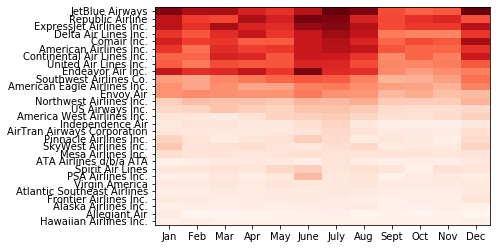

In [37]:
plt.pcolor(carrier_delay, cmap='Reds')

tick_labels = carrier_delay.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

In [38]:
df.head()

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_ratio,cancelled_ratio,delayed_ratio
0,2004,5,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1296.0,277.0,66.43,4.00,166.35,...,6.0,13201.0,4795.0,409.0,5761.0,8.0,2228.0,1018.595679,0.077160,21.373457
1,2004,5,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",2684.0,461.0,70.67,1.32,189.79,...,8.0,20322.0,3605.0,36.0,6773.0,449.0,9459.0,757.153502,0.037258,17.175857
2,2004,5,Continental Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",31.0,5.0,0.72,1.00,3.28,...,0.0,278.0,86.0,73.0,119.0,0.0,0.0,896.774194,0.000000,16.129032
3,2004,5,Atlantic Coast Airlines,JFK,"New York, NY: John F. Kennedy International",445.0,96.0,30.73,3.40,24.62,...,2.0,7433.0,1986.0,471.0,1728.0,0.0,3248.0,1670.337079,1.797753,21.573034
4,2004,5,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1175.0,317.0,51.60,1.93,227.31,...,2.0,13689.0,3113.0,57.0,8289.0,28.0,2202.0,1165.021277,0.255319,26.978723


# Cancelled Flights 2018, LaGuardia

In [39]:
lga2018 = df[(df.airport == 'LGA') & (df.year == 2018)]

In [40]:
lga2018['cancelled_lgaratio'] = ((lga2018['arr_cancelled'] + lga2018['arr_diverted']) *100) / (lga2018['arr_flights'])

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
cancelledlga = lga2018.pivot_table(columns='month', index='carrier_name', values='cancelled_lgaratio')#.reset_index()

In [42]:
cancelled_lga = cancelledlga.sort_values(7)

([<matplotlib.axis.XTick at 0x11920d080>,
 <a list of 12 Text xticklabel objects>)

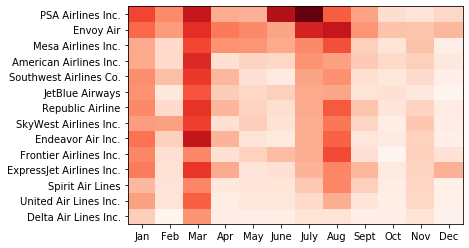

In [43]:
plt.pcolor(cancelled_lga, cmap='Reds')

tick_labels = cancelled_lga.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Weather Delays 2018, LaGuardia

In [44]:
lga2018['lga_weatherratio'] = (lga2018['weather_ct'] *100) / (lga2018['arr_flights'])

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
weatherlga = lga2018.pivot_table(columns='month', index='carrier_name', values='lga_weatherratio')#.reset_index()

In [46]:
weatherlga = weatherlga.sort_values(7)

([<matplotlib.axis.XTick at 0x12269fb00>,
 <a list of 12 Text xticklabel objects>)

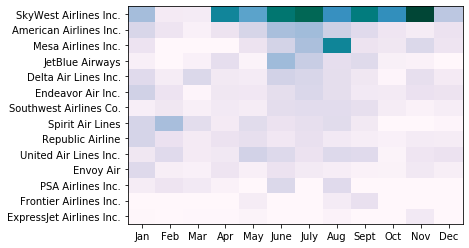

In [47]:
plt.pcolor(weatherlga, cmap='PuBuGn')

tick_labels = weatherlga.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)